## ECCO - Melville Bay

### Export netcdfs for sequential rows

In [20]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import glob

#### Create netCDFs for theta and salt

In [21]:
ecco_melville_theta_dir = Path('H:/PhD_chap3/data/ECCO_melville/W_Greenland/THETA/')
ecco_melville_salt_dir = Path('H:/PhD_chap3/data/ECCO_melville/W_Greenland/SALT/')

In [22]:
theta_files = list(ecco_melville_theta_dir.glob('*nc'))
salt_files = list(ecco_melville_salt_dir.glob('*nc'))

In [7]:
## theta
theta_ds = xr.open_mfdataset(theta_files,combine='nested',concat_dim='time',parallel=True,\
                            data_vars='all', coords='all')

In [8]:
## salt
salt_ds = xr.open_mfdataset(salt_files,combine='nested',concat_dim='time',parallel=True,\
                            data_vars='all', coords='all')

Need to make a coordinate that combines year, month, and day

In [9]:
def create_time_dt64(ecco_ds):
    time_list = []
    for i in range(len(ecco_ds.time.values)):
        year  = ecco_ds.years.isel(time=i).values
        month = ecco_ds.months.isel(time=i).values
        day   = ecco_ds.days.isel(time=i).values
        
        if month<10 and day<10:
            time_tmp = str(year)+'-'+'0'+str(month)+'-'+'0'+str(day)
        elif month<10 and day>=10: 
            time_tmp = str(year)+'-'+'0'+str(month)+'-'+str(day)
        elif month>=10 and day<10: 
            time_tmp = str(year)+'-'+str(month)+'-'+'0'+str(day)
        else:
            time_tmp = str(year)+'-'+str(month)+'-'+str(day)
        
        time_list.append(time_tmp)
    
    time_dt64 = np.array(time_list, dtype='datetime64')
        
    return time_dt64

In [10]:
time_dt64 = create_time_dt64(theta_ds)

Add new time coordinate to dataset

In [11]:
theta_time_ds = theta_ds.assign_coords({"time":time_dt64})
salt_time_ds  = salt_ds.assign_coords({"time":time_dt64})

Extract rows and export to individual netcdfs

In [12]:
theta_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/'

In [13]:
salt_dir = 'H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/'

In [14]:
# test one dataset to make sure it works
theta_time_ds.isel(rows=150).load().to_netcdf(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

In [19]:
theta_time_ds.isel(rows=0).load().to_netcdf(theta_dir + 'W_Greenland_THETA_2015to2018_row000.nc')
theta_time_ds.isel(rows=25).load().to_netcdf(theta_dir + 'W_Greenland_THETA_2015to2018_row025.nc')
theta_time_ds.isel(rows=50).load().to_netcdf(theta_dir + 'W_Greenland_THETA_2015to2018_row050.nc')
theta_time_ds.isel(rows=75).load().to_netcdf(theta_dir + 'W_Greenland_THETA_2015to2018_row075.nc')
theta_time_ds.isel(rows=100).load().to_netcdf(theta_dir + 'W_Greenland_THETA_2015to2018_row100.nc')
theta_time_ds.isel(rows=125).load().to_netcdf(theta_dir + 'W_Greenland_THETA_2015to2018_row125.nc')
theta_time_ds.isel(rows=150).load().to_netcdf(theta_dir + 'W_Greenland_THETA_2015to2018_row150.nc')

In [23]:
salt_time_ds.isel(rows=0).load().to_netcdf(salt_dir + 'W_Greenland_SALT_2015to2018_row000.nc')
salt_time_ds.isel(rows=25).load().to_netcdf(salt_dir + 'W_Greenland_SALT_2015to2018_row025.nc')
salt_time_ds.isel(rows=50).load().to_netcdf(salt_dir + 'W_Greenland_SALT_2015to2018_row050.nc')
salt_time_ds.isel(rows=75).load().to_netcdf(salt_dir + 'W_Greenland_SALT_2015to2018_row075.nc')
salt_time_ds.isel(rows=100).load().to_netcdf(salt_dir + 'W_Greenland_SALT_2015to2018_row100.nc')
salt_time_ds.isel(rows=125).load().to_netcdf(salt_dir + 'W_Greenland_SALT_2015to2018_row125.nc')
salt_time_ds.isel(rows=150).load().to_netcdf(salt_dir + 'W_Greenland_SALT_2015to2018_row150.nc')

In [16]:
# loop to export separate netcdfs for each selected row (every 25 rows from 0 to 150)
rows_indices = np.arange(0,175,25)

for i in range(len(rows_indices)):
    filename = 'W_Greenland_THETA_2015to2018_row' + str(rows_indices[i]) + '.nc'
    theta_select = theta_time_ds.isel(rows=i)
    theta_select.load().to_netcdf('H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/' + filename)
    theta_select.close()

In [17]:
rows_indices = np.arange(0,175,25)
for i in range(len(rows_indices)):
    filename = 'W_Greenland_SALT_2015to2018_row' + str(rows_indices[i]) + '.nc'
    salt_select = salt_time_ds.isel(rows=i)
    salt_select.load().to_netcdf('H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/SALT/' + filename)
    salt_select.close()

Look at a dataset

In [15]:
tmp = xr.open_dataset("H:/PhD_chap3/data/ECCO_melville/rows_netcdfs/THETA/W_Greenland_THETA_2015to2018_row150.nc")

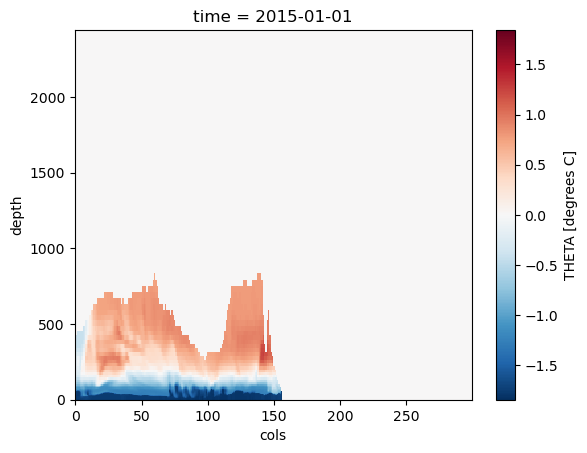

In [17]:
tmp.isel(time=0).THETA.plot()